In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense,Input, Reshape

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28*28)) / 256
x_test = x_test.reshape((10000, 28*28)) / 256
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


Actual Lable : 9


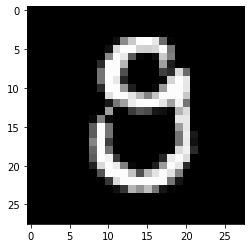

In [3]:
print("Actual Lable :", y_train[80])
plt.imshow(x_train[80].reshape((28,28)), cmap="gray")

### Create Autoencoder Model

In [4]:
def create_autoencoder_model():
    
    tf.keras.backend.clear_session()
    
    # Define encoder
    input_img = Input(shape=(28*28,))
    encoder = Dense(128, activation="relu")(input_img)
    encoder = Dense(64, activation="relu")(encoder)
    encoder = Dense(36, activation="sigmoid")(encoder)
 
    # Define decoder
    encoded_img = Input(shape=(36,))
    decoder = Dense(64, activation="relu")(encoded_img)
    decoder = Dense(128, activation="relu")(decoder)
    decoder = Dense(28*28, activation="sigmoid")(decoder)
    
    print("Encoder Model")   
    encoder_model = Model(input_img,encoder)
    encoder_model.summary()
    
    print("Decoder Model")   
    decoder_model = Model(encoded_img, decoder)
    decoder_model.summary()
    
    print("Complete Model")   
    auto_encoder_model = Model(input_img, decoder_model(encoder_model(input_img)))
    #auto_encoder_model = Model(decoder, encoder)
    
    #auto_encoder_model.compile(optimizer='adam', loss="mse", metrics=["accuracy"])
    # auto_encoder_model.compile(optimizer='adam', loss="mse")
    auto_encoder_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
    
    auto_encoder_model.summary()
    
    return auto_encoder_model, encoder_model, decoder_model

model, encoder_model, decoder_model = create_autoencoder_model()

Instructions for updating:
Colocations handled automatically by placer.
Encoder Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 36)                2340      
Total params: 111,076
Trainable params: 111,076
Non-trainable params: 0
_________________________________________________________________
Decoder Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 

### Let's train the model

In [5]:
history = model.fit(x=x_train, y=x_train, 
          batch_size=128, epochs=40, 
          verbose=1,
         validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2647 - acc: 0.7924 - val_loss: 0.2252 - val_acc: 0.7910
Epoch 2/40
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1987 - acc: 0.7934 - val_loss: 0.1736 - val_acc: 0.7941
Epoch 3/40
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1609 - acc: 0.7984 - val_loss: 0.1497 - val_acc: 0.7997
Epoch 4/40
60000/60000 [==============================] - 10s 162us/sample - loss: 0.1456 - acc: 0.8008 - val_loss: 0.1398 - val_acc: 0.8003
Epoch 5/40
60000/60000 [==============================] - 11s 175us/sample - loss: 0.1372 - acc: 0.8020 - val_loss: 0.1321 - val_acc: 0.8015
Epoch 6/40
60000/60000 [==============================] - 10s 170us/sample - loss: 0.1307 - acc: 0.8030 - val_loss: 0.1271 - val_acc: 0.8021
Epoch 7/40
60000/60000 [==============================] -

In [6]:
# Plot training & validation accuracy values
# def plot_keras_history(h):
#     plt.plot(h.history['acc'])
#     plt.plot(h.history['val_acc'])
#     plt.title('Model accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Test'], loc='upper left')
#     plt.show()

# plot_keras_history(history)

### Now Let's visualize them

In [6]:
def show_mnist(data):
    n = len(data)
    assert n <= 5
    
    fig, axs = plt.subplots(3, n, sharex=True, sharey=True, squeeze=False, figsize=(20,10))
    
    fig.suptitle("Autoencoder demo")
    
    for i,img in enumerate(data):
        # Show origial image
        p = axs[0,i]
        p.imshow(img.reshape((28,28)), cmap="gray")
        p.title.set_text("Original")
        
        encoded = encoder_model.predict(img.reshape((1,28*28))) 
        # Show encoded image
        p2 = axs[1,i]
        p2.imshow(encoded.reshape((6,6)), cmap="gray")
        p2.title.set_text("Encoded")
        
        decoded = decoder_model.predict(encoded) 
        # Show encoded image
        p2 = axs[2,i]
        p2.imshow(decoded.reshape((28,28)), cmap="gray")
        p2.title.set_text("Decoded")
        

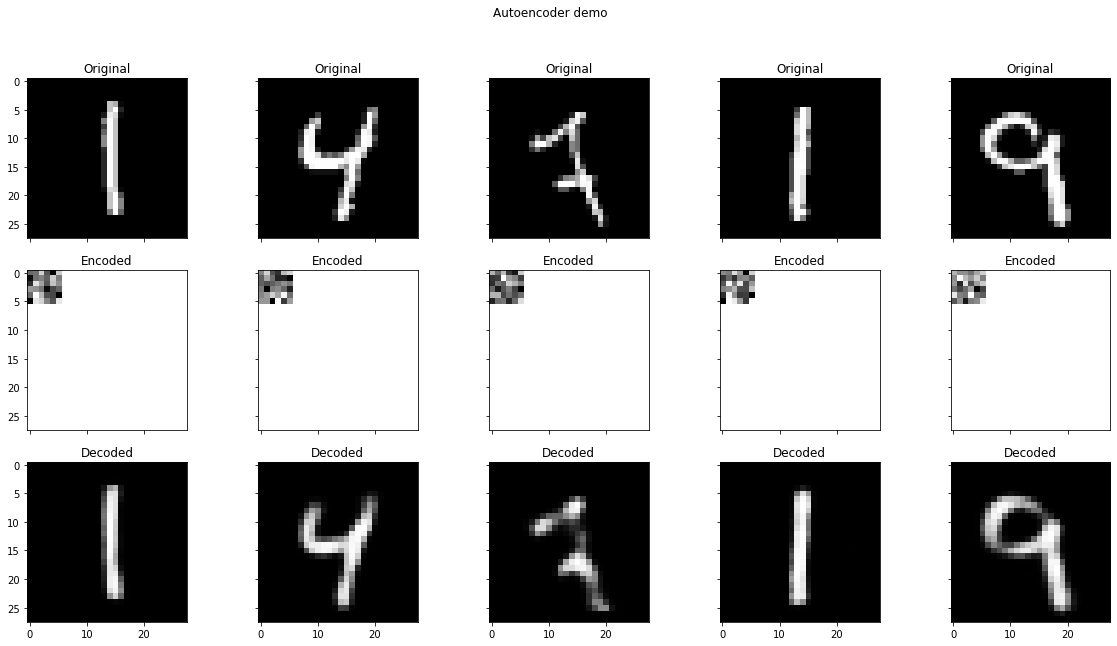

In [7]:
indices = np.random.choice(np.arange(len(x_test)), 5)
show_mnist(x_test[indices])

(1, 36)
[[0.31622195 0.6942592  0.70373744 0.40206656 0.4637347  0.62620723]
 [0.1921328  0.33362642 0.31054547 0.83801657 0.21223009 0.61602825]
 [0.47047085 0.8067406  0.3552696  0.85232687 0.79260874 0.2930956 ]
 [0.6195492  0.54639226 0.37220052 0.8265557  0.49656844 0.43954986]
 [0.5214163  0.5634805  0.4956226  0.5188852  0.28292817 0.33229125]
 [0.24894539 0.20504981 0.36102998 0.5286946  0.41876492 0.2766394 ]]
[[0.24099352 0.04054169 0.22603808 0.03018796 0.06309749 0.00775098]
 [0.16933206 0.2018035  0.08619492 0.13080173 0.24546947 0.19486275]
 [0.19204794 0.17814484 0.0163663  0.08389777 0.14072276 0.13195984]
 [0.18268508 0.05422934 0.05577822 0.16813667 0.00659224 0.12594192]
 [0.14108768 0.1521673  0.11702833 0.20111446 0.20959107 0.1577073 ]
 [0.05607984 0.03659192 0.06484379 0.2306794  0.05322417 0.24973786]]


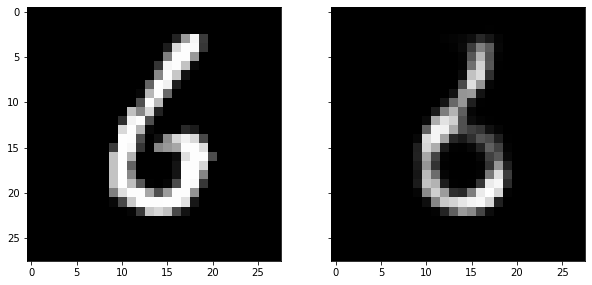

In [8]:
n = 50
orginal_img = x_test[n]
encoded = encoder_model.predict(orginal_img.reshape((1,28*28)))
print(encoded.shape)
print(encoded.reshape((6,6)))
random_data = np.random.random(size=(1,36)) / 4
print(random_data.reshape((6,6)))
decoded = decoder_model.predict(encoded+random_data)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, squeeze=False, figsize=(10,5))
axes[0,0].imshow(orginal_img.reshape((28,28)), cmap="gray")
axes[0,1].imshow(decoded.reshape((28,28)), cmap="gray")

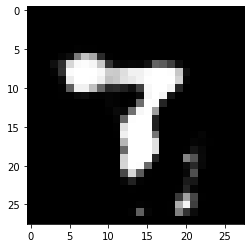

In [9]:
random_data = np.random.random(size=(1,36))
decoded = decoder_model.predict(random_data)
plt.imshow(decoded.reshape((28,28)), cmap="gray")

#### Lets save the models

In [10]:
model.save("./model_store/model_1/auto-encoder-model.h5")
encoder_model.save("./model_store/model_1/encoder-model.h5")
encoder_model.save_weights("./model_store/model_1/encoder-model-weights.h5")
decoder_model.save("./model_store/model_1/decoder-model.h5")
decoder_model.save_weights("./model_store/model_1/decoder-model-weights.h5")